In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
aq = pd.read_csv('aq_filled.csv', parse_dates=[0], index_col=0)
kastom = pd.read_csv('kastom_filled.csv', parse_dates=[0], index_col=0)
kunak = pd.read_csv('kunak_filled.csv', parse_dates=[0], index_col=0)
airly = pd.read_csv('airly_filled.csv', parse_dates=[0], index_col=0)

## NO2

In [3]:
nox_raw = pd.concat([aq['NO2 (ppb)'], kastom['no2_ppb'], kunak['NO2 (ppb)']], axis=1)
nox = nox_raw.dropna(how='any', axis=0)
nox.columns = ['aqmesh', 'kastom', 'kunak']

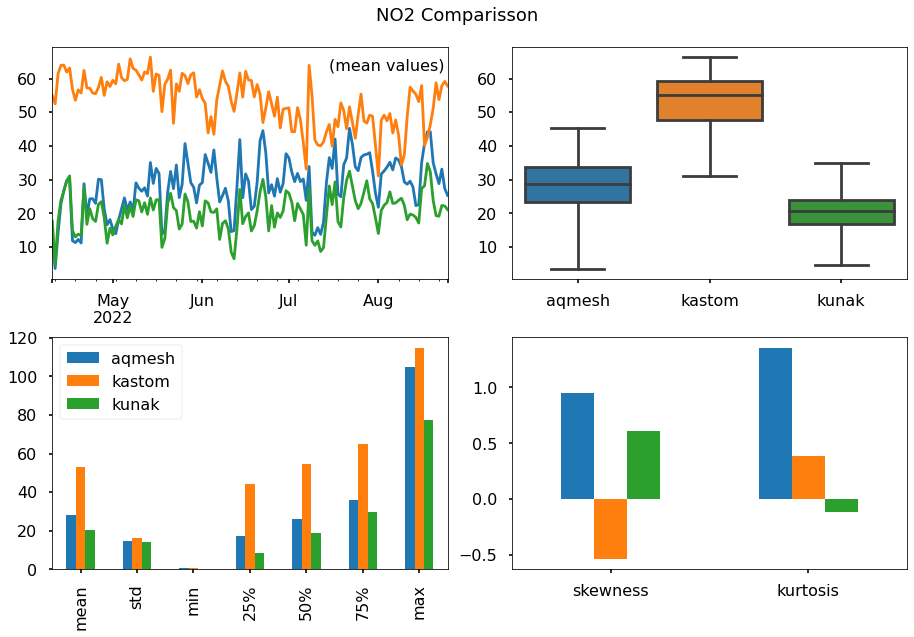

In [64]:
plt.style.use('seaborn-poster')
fig, ax = plt.subplots(2,2)

nox.resample('D').mean().plot(ax=ax[0,0], legend=False)
ax[0,0].text(0.7, 0.9, "(mean values)", fontsize=16, transform=ax[0,0].transAxes)
sns.boxplot(data=nox.resample('D').mean(), ax=ax[0,1], whis=3)
nox.describe().drop(index='count').plot(kind='bar', ax=ax[1,0])
nox.agg(['skew', 'kurt']).plot(kind='bar', ax=ax[1,1], legend=False)
ax[1,1].set_xticklabels(['skewness', 'kurtosis'], rotation=0)

plt.suptitle('NO2 Comparisson', fontsize=18, y=1)
plt.tight_layout()
plt.savefig("Plots/no2comparisson.png")
plt.show()

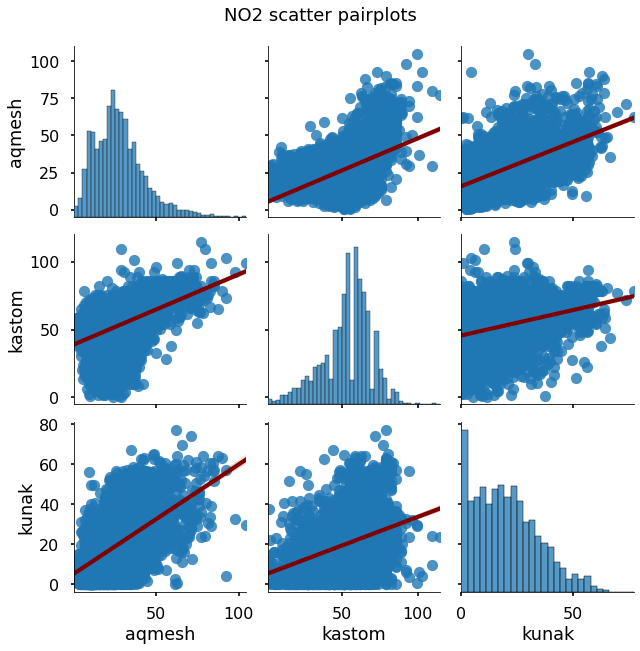

In [28]:
sns.pairplot(data=nox, kind='reg', plot_kws={'line_kws': {'color': 'maroon'}},height=3)
plt.suptitle('NO2 scatter pairplots', y=1, fontsize=18)
plt.tight_layout()
plt.savefig("Plots/no2pair.png")
plt.show()

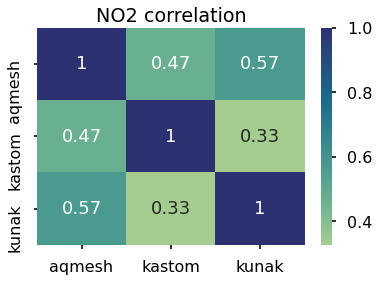

In [6]:
plt.figure(figsize=(6,4))
heatmap = sns.heatmap(nox.corr(), annot=True, cmap='crest', annot_kws = {'fontsize':18})
plt.title('NO2 correlation')
plt.savefig("Plots/no2corr.png")
plt.show()

## O3

In [7]:
o3_raw = pd.concat([aq['O3 (ppb)'], kunak['O3 (ppb)']], axis=1)
o3 = o3_raw.dropna(how='any', axis=0)
o3.columns = ['aqmesh', 'kunak']

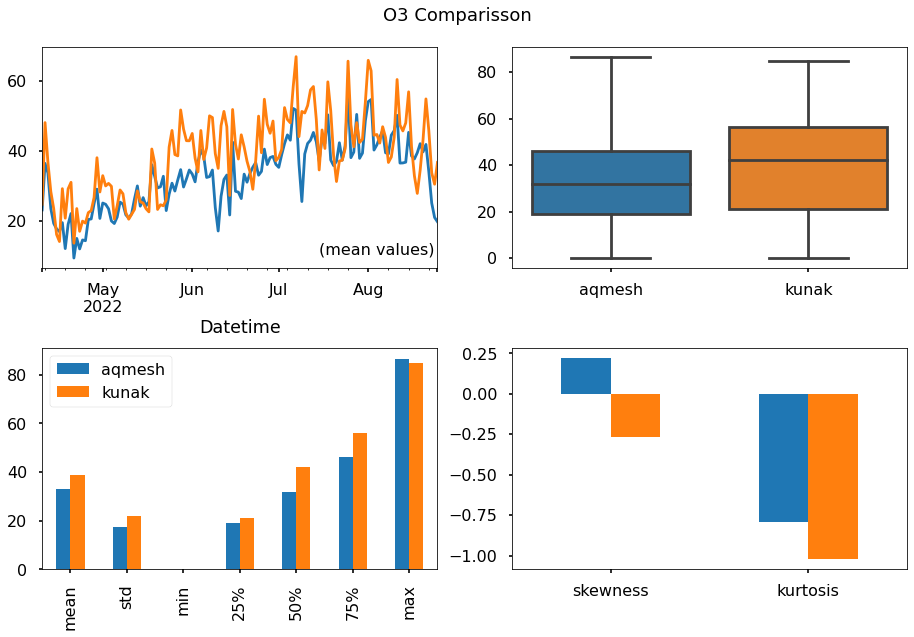

In [66]:
fig, ax = plt.subplots(2,2)

o3.resample('D').mean().plot(ax=ax[0,0], legend=False)
ax[0,0].text(0.7, 0.06, "(mean values)", fontsize=16, transform=ax[0,0].transAxes)
sns.boxplot(data=o3, ax=ax[0,1], whis=3)
o3.describe().drop(index='count').plot(kind='bar', ax=ax[1,0])
o3.agg(['skew', 'kurt']).plot(kind='bar', ax=ax[1,1], legend=False)
ax[1,1].set_xticklabels(['skewness', 'kurtosis'], rotation=0)

plt.suptitle('O3 Comparisson', fontsize=18, y=1)
plt.tight_layout()
plt.savefig("Plots/o3comparisson.png")
plt.show()

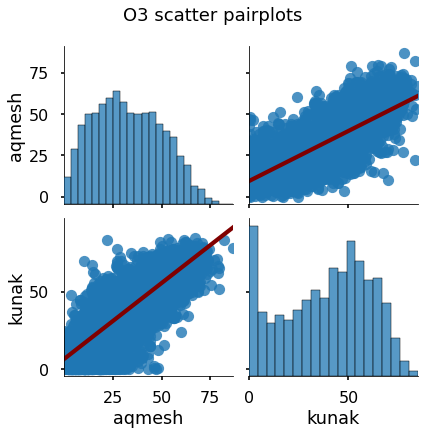

In [9]:
sns.pairplot(data=o3, kind='reg', plot_kws={'line_kws': {'color': 'maroon'}},height=3)
plt.suptitle('O3 scatter pairplots', y=1, fontsize=18)
plt.tight_layout()
plt.savefig("Plots/o3pair.png")
plt.show()

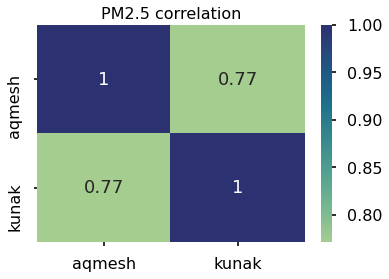

In [10]:
plt.figure(figsize=(6,4))
heatmap = sns.heatmap(o3.corr(), annot=True, cmap='crest', annot_kws = {'fontsize':18})
plt.title('PM2.5 correlation', fontsize=16)
plt.savefig("Plots/o3corr.png")
plt.show()

## PM2.5

In [11]:
pm25_raw = pd.concat([kastom['pm_2_5'], kunak['PM2.5 (ug/m3)'], airly['PM2.5 (ug/m3)']], axis=1)
pm25 = pm25_raw.dropna(how='any', axis=0)
pm25.columns = ['kastom', 'kunak', 'airly']

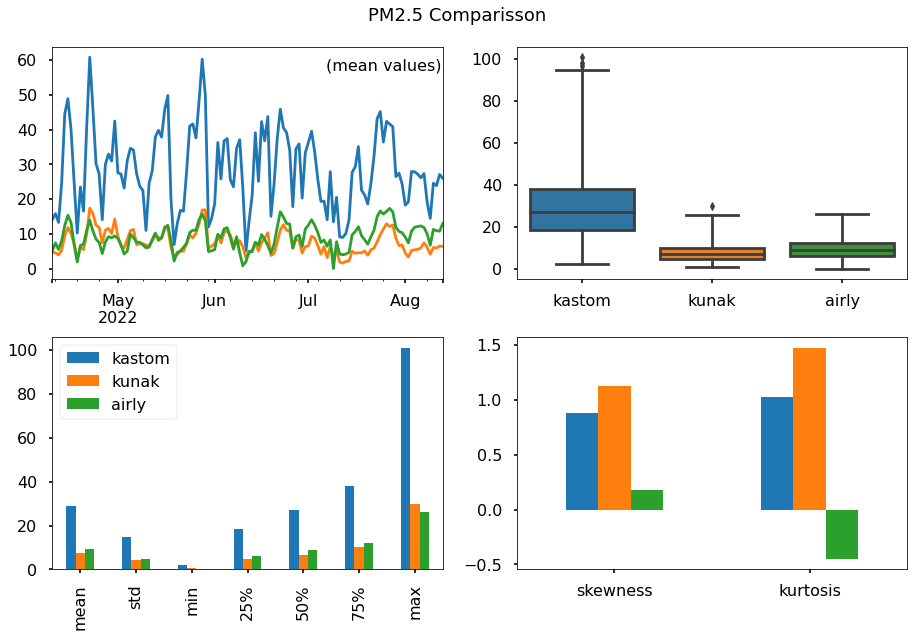

In [67]:
fig, ax = plt.subplots(2,2)

pm25.resample('D').mean().plot(ax=ax[0,0], legend=False)
ax[0,0].text(0.7, 0.9, "(mean values)", fontsize=16, transform=ax[0,0].transAxes)
sns.boxplot(data=pm25, ax=ax[0,1], whis=3)
pm25.describe().drop(index='count').plot(kind='bar', ax=ax[1,0])
pm25.agg(['skew', 'kurt']).plot(kind='bar', ax=ax[1,1], legend=False)
ax[1,1].set_xticklabels(['skewness', 'kurtosis'], rotation=0)

plt.suptitle('PM2.5 Comparisson', fontsize=18, y=1)
plt.tight_layout()
plt.savefig("Plots/pmcomparisson.png")
plt.show()

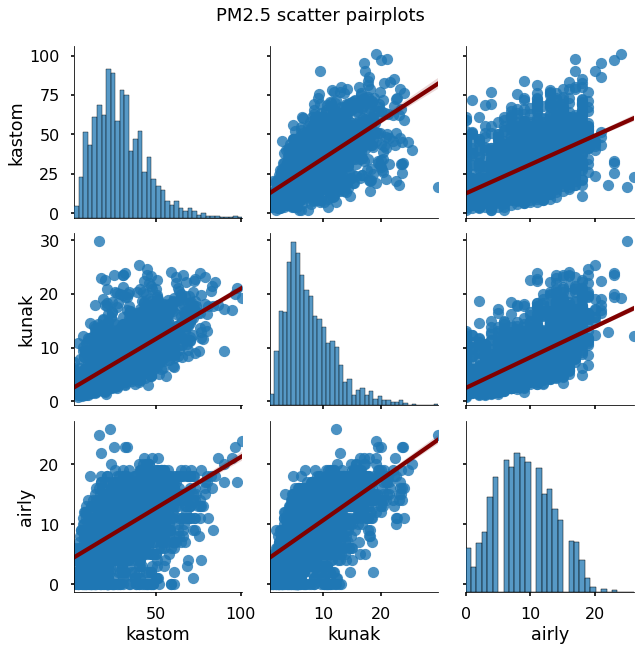

In [13]:
sns.pairplot(data=pm25, kind='reg', plot_kws={'line_kws': {'color': 'maroon'}},height=3)
plt.suptitle('PM2.5 scatter pairplots', y=1, fontsize=18)
plt.tight_layout()
plt.savefig("Plots/pmpair.png")
plt.show()

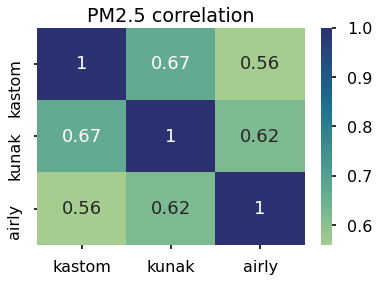

In [14]:
plt.figure(figsize=(6,4))
heatmap = sns.heatmap(pm25.corr(), annot=True, cmap='crest', annot_kws = {'fontsize':18})
plt.title('PM2.5 correlation')
plt.savefig("Plots/pmcorr.png")
plt.show()